# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?q=east london'+'&appid='+weather_api_key
weather_response = requests.get(url)
weather_json = weather_response.json()   

In [4]:
#Prepare list to hold retruned api call value
lat = []
lng = []
temp = []
humidity =[]
clouds = []
wind = []
max_temp = []
cities_ls = []
country = []
date = []
cityid = []
#For each city generataed in the cities list, make an API call.
for i in range(len(cities)):
    url = 'http://api.openweathermap.org/data/2.5/weather?q='+cities[i]+'&appid='+weather_api_key
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    try:
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        temp.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        wind.append(weather_json['wind']['speed'])
        max_temp.append(weather_json['main']['temp_max'])
        cities_ls.append(weather_json['name'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        cityid.append(i)
        print(f"Processing Record {i} | {cities[i]}")
    except:
        print("City Data doesn't exist")
        
weather_dict = {
    "City ID":cityid,
    "City": cities_ls,
    "Lat": lat,
    "Lng": lng,    
    "Max Temp": max_temp,
    "Humidity": humidity,  
    "Cloudiness": clouds,
    "Wind Speed":wind,
    "Country": country,
    "Date": date
}

Processing Record 0 | busselton
Processing Record 1 | qaanaaq
Processing Record 2 | rawson
Processing Record 3 | rikitea
Processing Record 4 | limon
Processing Record 5 | bethel
Processing Record 6 | yellowknife
Processing Record 7 | bengkulu
Processing Record 8 | homer
Processing Record 9 | la asuncion
Processing Record 10 | bako
Processing Record 11 | marsh harbour
Processing Record 12 | nikolsk
City Data doesn't exist
Processing Record 14 | carnarvon
Processing Record 15 | hilo
Processing Record 16 | saint-augustin
Processing Record 17 | ozernovskiy
Processing Record 18 | nantucket
Processing Record 19 | severo-kurilsk
Processing Record 20 | mehamn
Processing Record 21 | haines junction
Processing Record 22 | bluff
Processing Record 23 | baghdad
City Data doesn't exist
Processing Record 25 | albany
Processing Record 26 | upernavik
Processing Record 27 | kavieng
Processing Record 28 | jamestown
Processing Record 29 | leogane
Processing Record 30 | norman wells
Processing Record 31 | 

Processing Record 254 | okhotsk
Processing Record 255 | linhares
Processing Record 256 | ibra
Processing Record 257 | oriximina
Processing Record 258 | nhulunbuy
City Data doesn't exist
Processing Record 260 | villarrica
Processing Record 261 | portland
Processing Record 262 | victoria
Processing Record 263 | san jose
Processing Record 264 | black river
Processing Record 265 | altay
Processing Record 266 | ngunguru
Processing Record 267 | lavrentiya
Processing Record 268 | dalbandin
Processing Record 269 | aksay
Processing Record 270 | potosi
Processing Record 271 | thinadhoo
Processing Record 272 | lebu
Processing Record 273 | fortuna
Processing Record 274 | chuy
City Data doesn't exist
Processing Record 276 | darnah
Processing Record 277 | provideniya
Processing Record 278 | palmer
Processing Record 279 | moroni
Processing Record 280 | pangai
City Data doesn't exist
Processing Record 282 | mesopotamia
Processing Record 283 | elban
Processing Record 284 | thompson
Processing Record 28

Processing Record 509 | vanimo
Processing Record 510 | cao bang
City Data doesn't exist
Processing Record 512 | puerto escondido
Processing Record 513 | chapais
Processing Record 514 | tancanhuitz
Processing Record 515 | napoleon
Processing Record 516 | otavi
Processing Record 517 | whitianga
Processing Record 518 | alakurtti
City Data doesn't exist
Processing Record 520 | north platte
Processing Record 521 | safi
Processing Record 522 | panguna
Processing Record 523 | sangar
Processing Record 524 | goderich
Processing Record 525 | itaqui
Processing Record 526 | kupang
Processing Record 527 | santa cruz
Processing Record 528 | biloela
Processing Record 529 | kon tum
Processing Record 530 | sobolevo
Processing Record 531 | bairiki
Processing Record 532 | vaitape
City Data doesn't exist
Processing Record 534 | tuscaloosa
Processing Record 535 | praia
Processing Record 536 | axim
Processing Record 537 | latung
Processing Record 538 | dogondoutchi
Processing Record 539 | port macquarie
Pro

In [5]:
#Date column needs to convert to readable format
weather_data = pd.DataFrame(weather_dict)
weather_data['Max Temp'] = (weather_data['Max Temp']-273.15)*9/5+32
weather_data.set_index('City ID',inplace = True)
weather_data.index.name = None
weather_data.head() 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,51.008,98,84,0.45,AU,1619809387
1,Qaanaaq,77.4840,-69.3632,33.134,67,90,2.80,GL,1619809532
2,Rawson,-43.3002,-65.1023,72.752,24,72,3.75,AR,1619809533
3,Rikitea,-23.1203,-134.9692,78.854,77,21,9.28,PF,1619809533
4,Puerto Limón,10.0000,-83.0333,86.000,66,0,4.12,CR,1619809453


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data.to_csv("Output/city_data.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
weather_humidityover100=weather_data.loc[weather_data['Humidity'] >100,:]
weather_humidityover100.count()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [8]:
# Create a function to draw scatter plot for the parameters passing in, and automatcially name and output the png file
def drawscatterplot(lat, max_temp, xlabel, ylabel, title ):
    plt.scatter(lat,max_temp)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(f"Output/{ylabel}vs{xlabel}.png")
    plt.show()

## Latitude vs. Temperature Plot

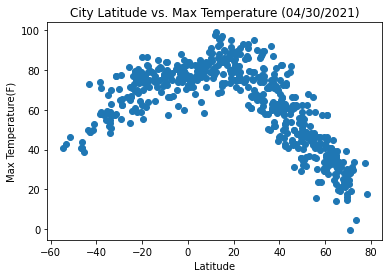

In [9]:
drawscatterplot(weather_data['Lat'],weather_data['Max Temp'],'Latitude','Max Temperature(F)', 'City Latitude vs. Max Temperature (04/30/2021)')

## Latitude vs. Humidity Plot

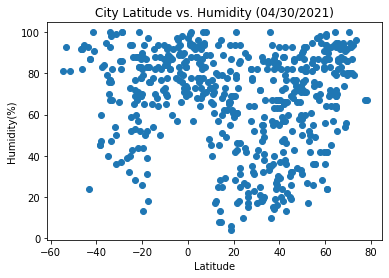

In [10]:
drawscatterplot(weather_data['Lat'],weather_data['Humidity'],'Latitude','Humidity(%)','City Latitude vs. Humidity (04/30/2021)')

## Latitude vs. Cloudiness Plot

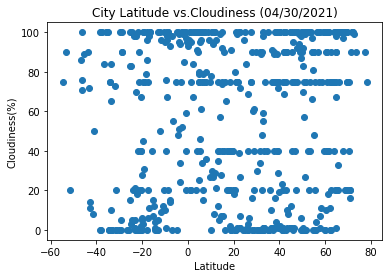

In [11]:
drawscatterplot(weather_data['Lat'],weather_data['Cloudiness'],'Latitude','Cloudiness(%)','City Latitude vs.Cloudiness (04/30/2021)')

## Latitude vs. Wind Speed Plot

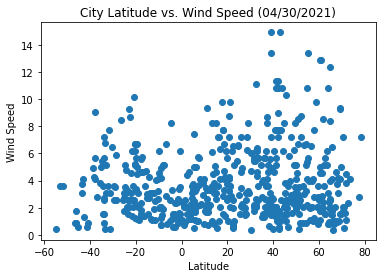

In [12]:
drawscatterplot(weather_data['Lat'],weather_data['Wind Speed'],'Latitude','Wind Speed','City Latitude vs. Wind Speed (04/30/2021)')

## Linear Regression

In [13]:
# Split data set to nothern hemisphere and southern hemisphere
weather_data_nh = weather_data.loc[weather_data['Lat']>=0,:]
weather_data_sh = weather_data.loc[weather_data['Lat']<0,:]

In [24]:
# Create a function to draw linear regression for the parameters passing in, and automatcially name and output the png file
def drawlinreg(x, y, xlabel, ylabel, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    print(f"The r value is: {rvalue}")
    plt.savefig(f"Output/linearRegression{ylabel}vs{xlabel}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.8613234438366185


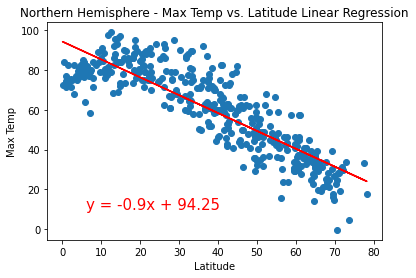

In [25]:
drawlinreg(weather_data_nh['Lat'],weather_data_nh['Max Temp'],'Latitude','Max Temp','Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.7300869686695104


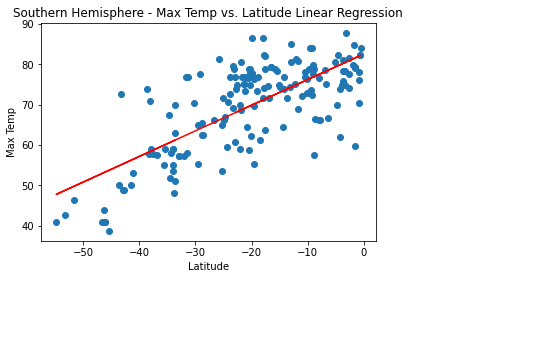

In [26]:
drawlinreg(weather_data_sh['Lat'],weather_data_sh['Max Temp'],'Latitude','Max Temp','Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

#### Analysis for Max Temp vs. Latitude Linear Regression plot:
* For both nothern and southern hemisphere, there is a strong linear relationship between temparture and latitude, the closer the latitude toward to 0, the higher the tempature is.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.08212173987875648


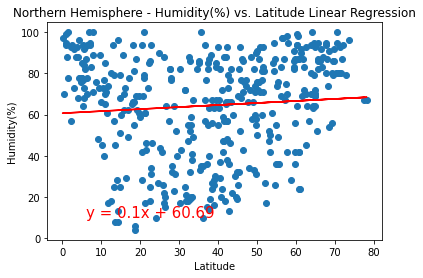

In [27]:
drawlinreg(weather_data_nh['Lat'],weather_data_nh['Humidity'],'Latitude','Humidity(%)','Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.08863320181438575


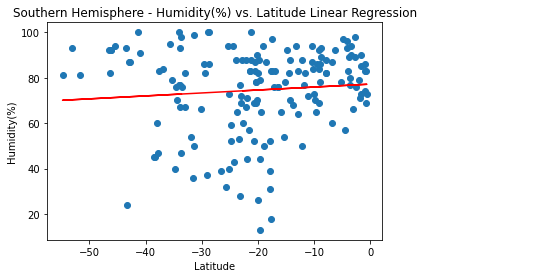

In [28]:
drawlinreg(weather_data_sh['Lat'],weather_data_sh['Humidity'],'Latitude','Humidity(%)','Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.07741091070559113


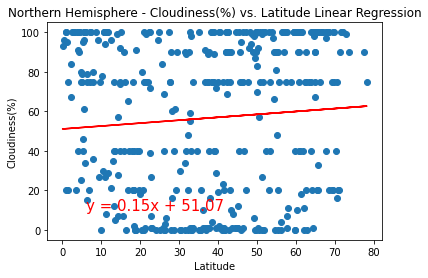

In [29]:
drawlinreg(weather_data_nh['Lat'],weather_data_nh['Cloudiness'],'Latitude','Cloudiness(%)','Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.11448917515828677


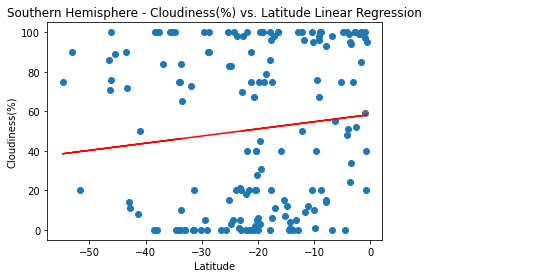

In [30]:
drawlinreg(weather_data_sh['Lat'],weather_data_sh['Cloudiness'],'Latitude','Cloudiness(%)','Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.06407354676621557


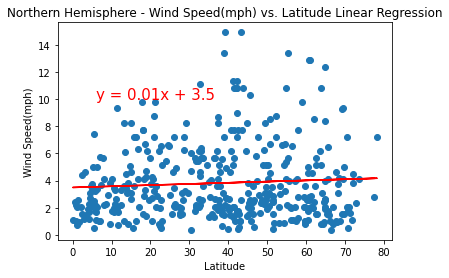

In [31]:
drawlinreg(weather_data_nh['Lat'],weather_data_nh['Wind Speed'],'Latitude','Wind Speed(mph)','Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.11776283996076725


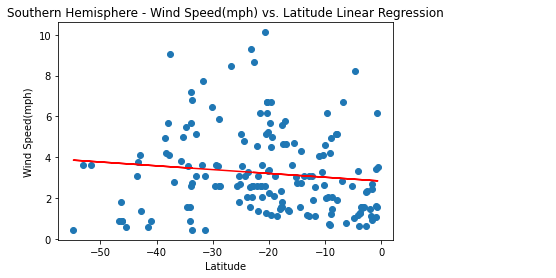

In [32]:
drawlinreg(weather_data_sh['Lat'],weather_data_sh['Wind Speed'],'Latitude','Wind Speed(mph)','Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression')